In [17]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt



In [18]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


In [19]:
train_images.shape



(60000, 28, 28)

In [20]:
test_images.shape


(10000, 28, 28)

In [21]:
train_images = train_images / 255.0 -0.5

test_images = test_images / 255.0 -0.5


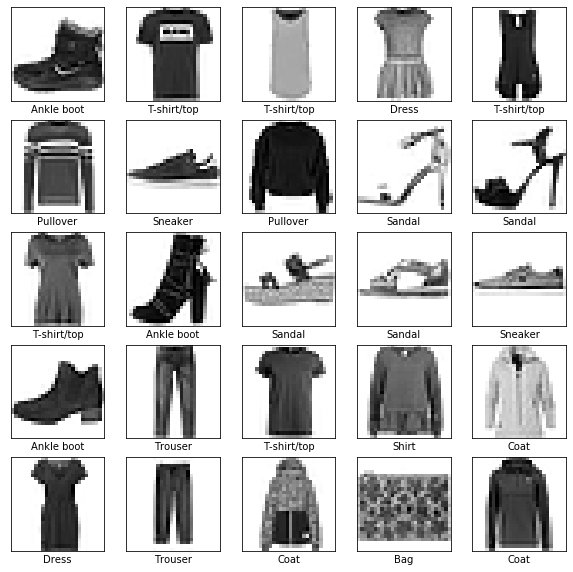

In [22]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()



## Build a NN model
`keras.Sequential`: the simplest "one-after-the-other" layer architecture



In [23]:
model = keras.Sequential([
    # keras.layers.Input(shape=(28,28)),
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])


## model.compile()
- Loss function —This measures how accurate the model is during training. You want to minimize this function to "steer" the model in the right direction.
- Optimizer —This is how the model is updated based on the data it sees and its loss function.
- Metrics —Used to monitor the training and testing steps. The following example uses accuracy, the fraction of the images that are correctly classified.



In [24]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])



In [25]:
model.fit(train_images, train_labels, epochs=5, batch_size=32)


Epoch 1/5
60000/60000 [==============================] - 4s 71us/sample - loss: 0.4856 - acc: 0.8238
Epoch 2/5
60000/60000 [==============================] - 4s 68us/sample - loss: 0.3778 - acc: 0.8619
Epoch 3/5
60000/60000 [==============================] - 4s 68us/sample - loss: 0.3418 - acc: 0.8752
Epoch 4/5
60000/60000 [==============================] - 4s 68us/sample - loss: 0.3162 - acc: 0.8830
Epoch 5/5
60000/60000 [==============================] - 4s 68us/sample - loss: 0.2978 - acc: 0.8900


In [26]:
test_loss, test_acc = model.evaluate(test_images,  test_labels)
              
print('\nTest accuracy:', test_acc)



10000/10000 [==============================] - 0s 41us/sample - loss: 0.3601 - acc: 0.8725

Test accuracy: 0.8725


In [27]:
predictions = model.predict(test_images)



In [28]:
predictions[0]


array([8.3835096e-07, 1.8867159e-08, 7.7899367e-09, 5.4062124e-09,
       2.4701194e-07, 6.3323593e-03, 2.2163682e-07, 7.7370750e-03,
       2.3547060e-05, 9.8590565e-01], dtype=float32)

In [29]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array, true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                  100*np.max(predictions_array),
                                  class_names[true_label]),
                                  color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array, true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)  
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')


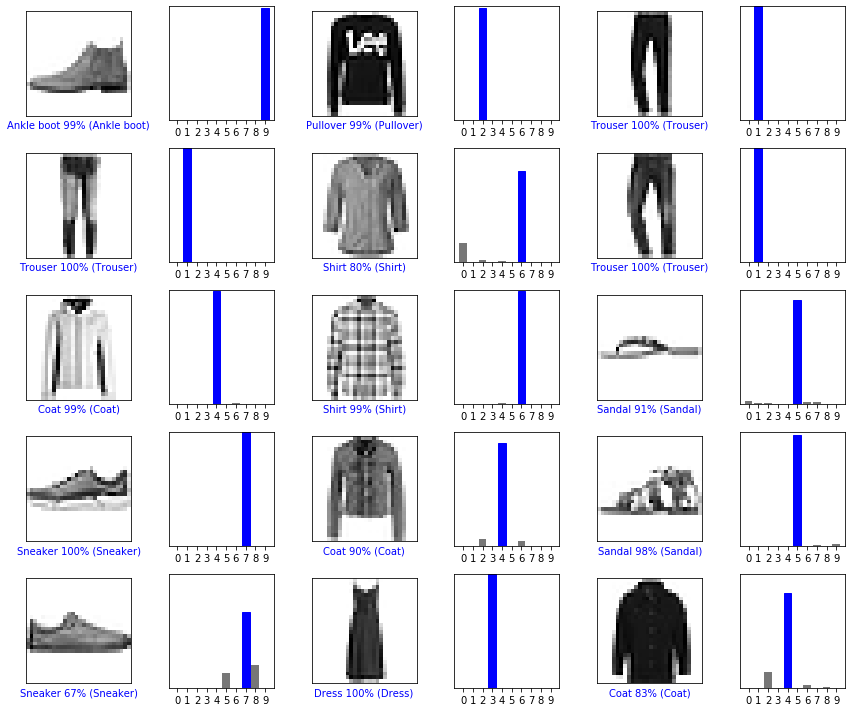

In [30]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()



In [31]:
img = test_images[1]

print(img.shape)
try:
    predictions_single = model.predict(img)
except:
    print("not working...")


(28, 28)
not working...


In [32]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

predictions_single = model.predict(img)

print(predictions_single)



(1, 28, 28)
[[1.1545530e-05 1.3584451e-08 9.8733771e-01 1.6518220e-07 6.6275746e-03
  1.1762369e-09 6.0230140e-03 2.4791910e-11 1.2723546e-08 6.8045633e-14]]
